In [2]:
#the input file here was created by uploading the feature table to the FBMN stats app for blank removal (0.3), imputation and TIC normalization, followed by download and manual transposition/reformating to standard format
import pandas as pd

# Load the CSV file
df = pd.read_csv('featuretable_reformated_blnkrem_transposed_format.csv', index_col='row ID')

# Convert to presence-absence format
presence_absence_df = df.applymap(lambda x: 1 if x > 0 else 0)

# Remove the string ' Peak area' from all column headers
presence_absence_df.columns = presence_absence_df.columns.str.replace(' Peak area', '')

# Save the new DataFrame to a CSV file
presence_absence_df.to_csv('featuretable_reformated_Interlaballmixes_FBMN_presence_absence_format.csv')

print("The file has been converted to presence-absence format and saved as 'presence_absence_format.csv'.")

The file has been converted to presence-absence format and saved as 'presence_absence_format.csv'.


In [3]:
import pandas as pd
import re

# Step 1: Load the presence-absence feature table
presence_absence_df = pd.read_csv('featuretable_reformated_Interlaballmixes_FBMN_presence_absence_format.csv', index_col='row ID')

# Step 2: Load the metadata
metadata_df = pd.read_csv('merged_metadata.tsv', sep='\t')

# Step 3: Clean the 'filename' column by stripping extensions
metadata_df['filename_clean'] = metadata_df['filename'].apply(lambda x: re.sub(r'\.mzML$|\.mzXML$', '', x, flags=re.IGNORECASE))

# Step 4: Map each sample to its lab
sample_to_lab = metadata_df.set_index('filename_clean')['ATTRIBUTE_Lab'].to_dict()

# Step 5: Filter feature table columns to those present in metadata
valid_samples = [col for col in presence_absence_df.columns if col in sample_to_lab]
filtered_df = presence_absence_df[valid_samples]

# Step 6: Group columns by lab and apply the aggregation rule
lab_groups = {}
for sample, lab in sample_to_lab.items():
    lab_groups.setdefault(lab, []).append(sample)

# Step 7: Create a new DataFrame with one column per lab, prefixed with "Lab "
lab_aggregated_df = pd.DataFrame(index=filtered_df.index)

for lab, samples in lab_groups.items():
    samples_in_df = [s for s in samples if s in filtered_df.columns]
    lab_column_name = f"Lab {lab}"
    lab_aggregated_df[lab_column_name] = (filtered_df[samples_in_df].sum(axis=1) > 0).astype(int)

# Optional: Save the result
lab_aggregated_df.to_csv('lab_aggregated_featuretable.csv')

# Calculating top100 and top1000

In [4]:
import pandas as pd

# 1. Load the modified feature table
feature_df = pd.read_csv('featuretable_reformated_blnkrem_transposed_format.csv', index_col='row ID')

# 2. Identify sample columns (those containing 'MS')
sample_columns = [col for col in feature_df.columns if 'MS' in col]

# 3. Compute 'Average_Abundance' (ignoring zero values)
feature_df['Average_Abundance'] = feature_df[sample_columns].replace(0, pd.NA).mean(axis=1)

# 4. Sort rows by 'Total_Abundance' in descending order
sorted_df = feature_df.sort_values(by='Average_Abundance', ascending=False)

# 5. Select top 1000 and top 100 rows
top_1000_df = sorted_df.head(1000)
top_100_df = sorted_df.head(100)

# 6. Save the filtered dataframes to CSV files (keeping all original columns)
top_1000_df.to_csv('featuretable_top_1000_features.csv', index=True)
top_100_df.to_csv('featuretable_top_100_features.csv', index=True)

print("Files saved:")
print("- Top 1000 features: 'featuretable_top_1000_features.csv'")
print("- Top 100 features: 'featuretable_top_100_features.csv'")

Files saved:
- Top 1000 features: 'featuretable_top_1000_features.csv'
- Top 100 features: 'featuretable_top_100_features.csv'


In [5]:
#the input file here was created by uploading the feature table to the FBMN stats app for blank removal (0.3), imputation and TIC normalization, followed by download and manual transposition/reformating to standard format
import pandas as pd

# Load the CSV file
df = pd.read_csv('featuretable_top_1000_features.csv', index_col='row ID')

# Convert to presence-absence format
presence_absence_df = df.applymap(lambda x: 1 if x > 0 else 0)

# Remove the string ' Peak area' from all column headers
presence_absence_df.columns = presence_absence_df.columns.str.replace(' Peak area', '')

# Save the new DataFrame to a CSV file
presence_absence_df.to_csv('top_1000_features_FBMN_presence_absence_format.csv')

print("The file has been converted to presence-absence format and saved as 'presence_absence_format.csv'.")

The file has been converted to presence-absence format and saved as 'presence_absence_format.csv'.


In [6]:
import pandas as pd
import re

# Step 1: Load the presence-absence feature table
presence_absence_df = pd.read_csv('top_1000_features_FBMN_presence_absence_format.csv', index_col='row ID')

# Step 2: Load the metadata
metadata_df = pd.read_csv('merged_metadata.tsv', sep='\t')

# Step 3: Clean the 'filename' column by stripping extensions
metadata_df['filename_clean'] = metadata_df['filename'].apply(lambda x: re.sub(r'\.mzML$|\.mzXML$', '', x, flags=re.IGNORECASE))

# Step 4: Map each sample to its lab
sample_to_lab = metadata_df.set_index('filename_clean')['ATTRIBUTE_Lab'].to_dict()

# Step 5: Filter feature table columns to those present in metadata
valid_samples = [col for col in presence_absence_df.columns if col in sample_to_lab]
filtered_df = presence_absence_df[valid_samples]

# Step 6: Group columns by lab and apply the aggregation rule
lab_groups = {}
for sample, lab in sample_to_lab.items():
    lab_groups.setdefault(lab, []).append(sample)

# Step 7: Create a new DataFrame with one column per lab, prefixed with "Lab "
lab_aggregated_df = pd.DataFrame(index=filtered_df.index)

for lab, samples in lab_groups.items():
    samples_in_df = [s for s in samples if s in filtered_df.columns]
    lab_column_name = f"Lab {lab}"
    lab_aggregated_df[lab_column_name] = (filtered_df[samples_in_df].sum(axis=1) > 0).astype(int)

# Optional: Save the result
lab_aggregated_df.to_csv('top_1000_features_lab_aggregated_featuretable.csv')

In [8]:
import pandas as pd

# Step 1: Load the full feature table
full_df = pd.read_csv('featuretable_reformated.csv')

# Step 2: Load the top 1000 feature IDs
top_1000_df = pd.read_csv('featuretable_top_1000_features.csv')

# Step 3: Filter full_df to keep only rows with 'row ID' in top_1000_df
filtered_df = full_df[full_df['row ID'].isin(top_1000_df['row ID'])]

# Step 4: Save the filtered DataFrame
filtered_df.to_csv('featuretable_filtered_top_1000.csv', index=False)

In [10]:
import pandas as pd

# Step 1: Load the full feature table
full_df = pd.read_csv('featuretable_reformated.csv')

# Step 2: Load the top 1000 feature IDs
top_1000_df = pd.read_csv('featuretable_top_100_features.csv')

# Step 3: Filter full_df to keep only rows with 'row ID' in top_1000_df
filtered_df = full_df[full_df['row ID'].isin(top_1000_df['row ID'])]

# Step 4: Save the filtered DataFrame
filtered_df.to_csv('featuretable_filtered_top_100.csv', index=False)

# Peak area by Number of Labs

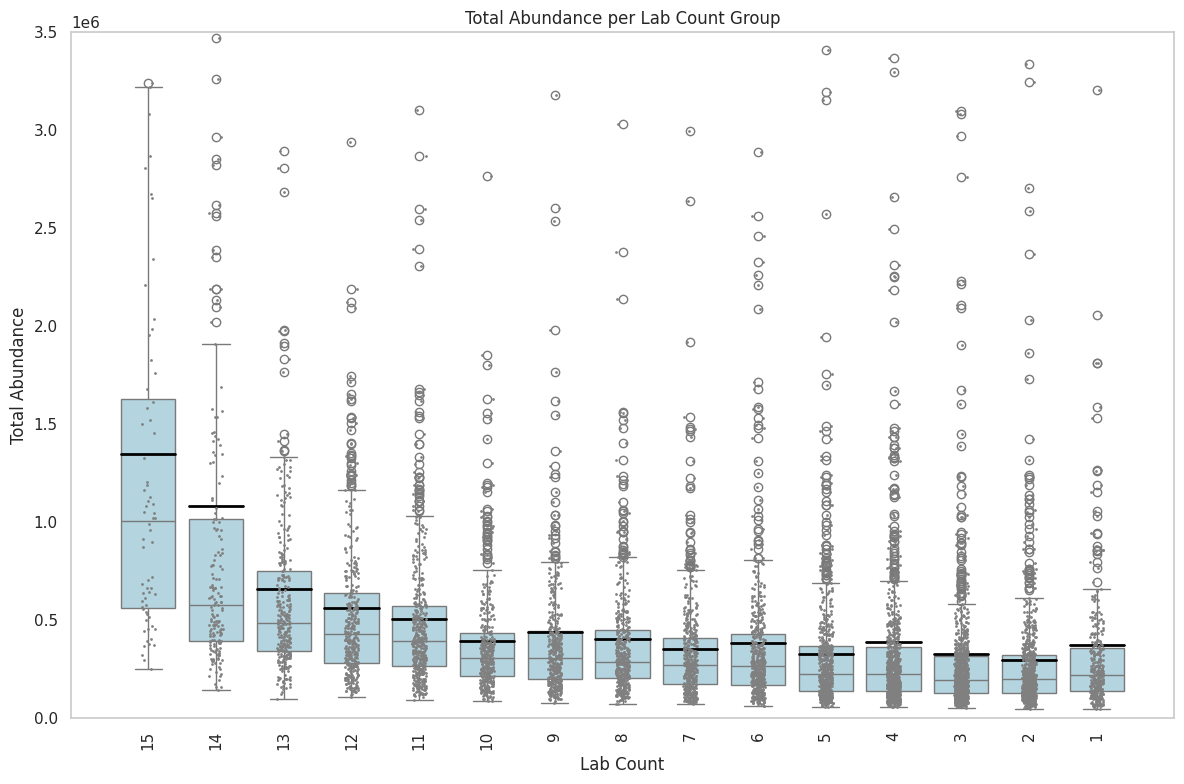

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the presence-absence grouped data
lab_df = pd.read_csv('lab_aggregated_featuretable.csv')

# Compute 'Lab_Count' by summing columns that contain 'Lab'
lab_columns = [col for col in lab_df.columns if 'Lab' in col]
lab_df['Lab_Count'] = lab_df[lab_columns].sum(axis=1)

# Load the modified feature table
feature_df = pd.read_csv('featuretable_reformated_blnkrem_transposed_format.csv')

# Identify sample columns (those containing '.mz')
sample_columns = [col for col in feature_df.columns if 'MS' in col]

# Compute 'Total_Abundance' by calculating mean while **ignoring zero values**
feature_df['Total_Abundance'] = feature_df[sample_columns].replace(0, pd.NA).mean(axis=1)

# Merge both DataFrames on 'row ID'
df = lab_df.merge(feature_df[['row ID', 'Total_Abundance']], on='row ID')

# Ensure 'Lab_Count' is a categorical variable, ordered from 15 to 1
df['Lab_Count'] = pd.Categorical(df['Lab_Count'], categories=list(range(15, 0, -1)), ordered=True)

# Plot boxplot
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

ax = sns.boxplot(
    data=df,
    x='Lab_Count',
    y='Total_Abundance',
    color='lightblue'  # Set fill color to light blue without gradient
)

sns.stripplot(
    data=df,
    x='Lab_Count',
    y='Total_Abundance',
    color='grey',  # Change sample marker dots to grey
    size=2,
    jitter=True,  # Prevent overlapping dots
    ax=ax
)

# Calculate means and plot them as solid lines
means = df.groupby('Lab_Count')['Total_Abundance'].mean().values
for i, mean in enumerate(means):
    plt.plot([i - 0.4, i + 0.4], [mean, mean], color='black', linestyle='-', linewidth=2)

plt.title('Total Abundance per Lab Count Group')
plt.xlabel('Lab Count')
plt.ylabel('Total Abundance')
plt.ylim(0, 3.5E6)
plt.grid(False)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Total_Abundance_per_Lab_Count_boxplot_FBMNaverage_nolog.svg')
plt.show()


# Cumucount

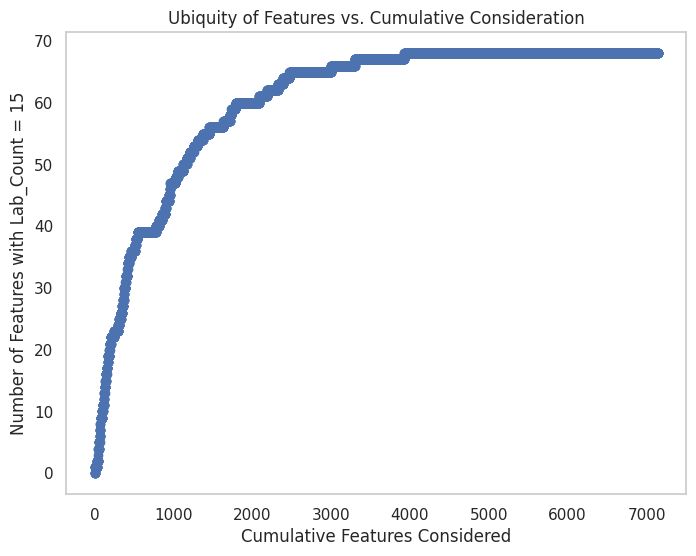

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Load the presence-absence grouped data
lab_df = pd.read_csv('lab_aggregated_featuretable.csv')

# 2. Compute 'Lab_Count' by summing columns that contain 'Lab'
lab_columns = [col for col in lab_df.columns if 'Lab' in col]
lab_df['Lab_Count'] = lab_df[lab_columns].sum(axis=1)

# 3. Load the modified feature table
feature_df = pd.read_csv('featuretable_reformated_blnkrem_transposed_format.csv')

# 4. Merge both DataFrames on 'row ID'
merged_df = feature_df.merge(lab_df[['row ID', 'Lab_Count']], on='row ID', how='left')

# 2. Identify sample columns (those containing '.mz')
sample_columns = [col for col in merged_df.columns if 'MS' in col]

# 3. Compute 'Total_Abundance' (ignoring zero values)
merged_df['Total_Abundance'] = merged_df[sample_columns].replace(0, pd.NA).mean(axis=1)

# 1. Sort the DataFrame by 'Total_Abundance' in descending order
sorted_df = merged_df.sort_values(by='Total_Abundance', ascending=False)

# 2. Initialize lists to store x and y values
x_values = np.arange(1, len(sorted_df) + 1)  # Cumulative features considered
y_values = [sorted_df.iloc[:i]['Lab_Count'].eq(15).sum() for i in x_values]  # Count of ubiquitous features

# 3. Plot the results
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-')
plt.xlabel('Cumulative Features Considered')
plt.ylabel('Number of Features with Lab_Count = 15')
plt.title('Ubiquity of Features vs. Cumulative Consideration')
plt.grid()
# Save the plot as an .svg file
plt.savefig('ubiquity_plot_FBMN_average.svg', format='svg')

plt.show()


# RF Merging features by annotation

In [13]:
import pandas as pd

# Step 1: Load and clean featuretable_reformated.csv
ft = pd.read_csv("featuretable_reformated.csv")
ft.columns = [col.replace(" Peak area", "") for col in ft.columns]

# Step 2: Load and rename column in merged_results_with_gnps.tsv
fbmn = pd.read_csv("merged_results_with_gnps.tsv", sep="\t")
fbmn = fbmn.rename(columns={"#Scan#": "row ID"})

# Step 3: Merge on 'row ID' (left join)
merged_df = pd.merge(ft, fbmn, on="row ID", how="left")

# Step 4: Save full merged DataFrame
merged_df.to_csv("FT_FBMN.csv", index=False)

# Step 5: Filter to keep 'row ID' and columns containing '.mz'
filtered_df = merged_df[[col for col in merged_df.columns if col == "row ID" or ".mz" in col]]
filtered_df.to_csv("FT_FBMN_short.csv", index=False)

In [14]:
import pandas as pd

# Step 1: Load the merged file
df = pd.read_csv("FT_FBMN.csv")

# Step 2: Remove rows with missing 'Compound_Name'
df_filtered = df[df['Compound_Name'].notna() & (df['Compound_Name'] != "")]

# Step 3: Save the filtered DataFrame
df_filtered.to_csv("FBMN_Only_LabIDs.csv", index=False)

/tmp/ipykernel_15511/722008373.py:4: DtypeWarning: Columns (284) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("FT_FBMN.csv")


In [15]:
import pandas as pd

# Read clustersummary_with_groups.tsv into df1 and merged_results_with_gnps.tsv into df2
df1 = pd.read_csv("FBMN_Only_LabIDs.csv", encoding='ISO-8859-1')
df2 = pd.read_csv("taglist.csv", encoding='ISO-8859-1')

# Merge dataframes based on the columns "row ID" in df1 and "#Scan#" in df2
merged_df = pd.merge(df1, df2, left_on="Compound_Name", right_on="Compound_Name_GNPS", how="left")

# Save the output as gnpsmergedtable05.csv
merged_df.to_csv("FBMN_Only_LabIDs_tagged.csv", index=False)

print("Filtered dataframe saved as gnpsmergedtable05.csv")

Filtered dataframe saved as gnpsmergedtable05.csv


In [16]:
import pandas as pd

# Step 1: Load the tagged file
df = pd.read_csv("FBMN_Only_LabIDs_tagged.csv")

# Step 2: Keep only columns with '.mz', 'row ID', and 'Assigned name'
columns_to_keep = [col for col in df.columns if ".mz" in col or col in ["row ID", "Assigned name"]]
df_filtered = df[columns_to_keep]

# Step 3: Rename 'Assigned name' to 'Compound_Name'
df_filtered = df_filtered.rename(columns={"Assigned name": "Compound_Name"})

# Step 4: Remove duplicate rows
df_filtered = df_filtered.drop_duplicates()

# Step 5: Save the filtered DataFrame
df_filtered.to_csv("FBMN_Only_LabIDs_tagged_SHORT.csv", index=False)

In [17]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('FBMN_Only_LabIDs_tagged_SHORT.csv')

# Identify columns with ".mz" in their headers
mz_columns = [col for col in df.columns if ".mz" in col]

# Group by 'Compound_Name' and aggregate
aggregated_df = df.groupby('Compound_Name').agg(
    {**{col: 'sum' for col in mz_columns},
     **{col: lambda x: '_'.join(x.astype(str)) for col in df.columns if col not in mz_columns + ['Compound_Name']}}
).reset_index()

# Rename 'row ID' to 'merged_IDs' and add new sequential 'row ID'
aggregated_df = aggregated_df.rename(columns={"row ID": "merged_IDs"})
aggregated_df.insert(0, "row ID", range(1, len(aggregated_df) + 1))

# Save the aggregated DataFrame to a new CSV file
aggregated_df.to_csv('aggregated_FBMN_Only_LabIDs.csv', index=False)

print("The rows have been aggregated and saved to 'aggregated_FBMN_Only_LabIDs.csv'.")

The rows have been aggregated and saved to 'aggregated_FBMN_Only_LabIDs.csv'.


In [18]:
import pandas as pd

# Load the aggregated feature table
features_df = pd.read_csv('aggregated_FBMN_Only_LabIDs.csv', encoding='ISO-8859-1')

# Load the metadata file
metadata_df = pd.read_csv('merged_metadata.tsv', sep='\t', encoding='ISO-8859-1')

# Extract sample columns from the feature table that match filenames in metadata
sample_columns = [col for col in features_df.columns if col in metadata_df['filename'].values]

# Map each filename to its corresponding lab
filename_to_lab = metadata_df.set_index('filename')['ATTRIBUTE_Lab'].to_dict()

# Group sample columns by lab
lab_groups = {}
for col in sample_columns:
    lab = filename_to_lab.get(col)
    if lab is not None:
        lab_groups.setdefault(lab, []).append(col)

# Split the feature table by lab and save each subset
for lab, cols in lab_groups.items():
    # Include non-sample columns (e.g., metadata, identifiers)
    non_sample_cols = [col for col in features_df.columns if col not in sample_columns]
    subset_df = features_df[non_sample_cols + cols]

    # Drop 'Compound_Name' and 'merged_IDs' if present
    subset_df = subset_df.drop(columns=['Compound_Name', 'merged_IDs'], errors='ignore')

    # Save to CSV
    output_filename = f'aggregated_by_lab_{lab}.csv'
    subset_df.to_csv(output_filename, index=False)
    print(f"✅ Saved lab {lab} subset to '{output_filename}' without Compound_Name and merged_IDs")

✅ Saved lab 1 subset to 'aggregated_by_lab_1.csv' without Compound_Name and merged_IDs
✅ Saved lab 2 subset to 'aggregated_by_lab_2.csv' without Compound_Name and merged_IDs
✅ Saved lab 5 subset to 'aggregated_by_lab_5.csv' without Compound_Name and merged_IDs
✅ Saved lab 6 subset to 'aggregated_by_lab_6.csv' without Compound_Name and merged_IDs
✅ Saved lab 7 subset to 'aggregated_by_lab_7.csv' without Compound_Name and merged_IDs
✅ Saved lab 8 subset to 'aggregated_by_lab_8.csv' without Compound_Name and merged_IDs
✅ Saved lab 9 subset to 'aggregated_by_lab_9.csv' without Compound_Name and merged_IDs
✅ Saved lab 12 subset to 'aggregated_by_lab_12.csv' without Compound_Name and merged_IDs
✅ Saved lab 15 subset to 'aggregated_by_lab_15.csv' without Compound_Name and merged_IDs
✅ Saved lab 16 subset to 'aggregated_by_lab_16.csv' without Compound_Name and merged_IDs
✅ Saved lab 18 subset to 'aggregated_by_lab_18.csv' without Compound_Name and merged_IDs
✅ Saved lab 19 subset to 'aggregate

# RF analysis. The output files from the previous section were individually analyzed on the FBMN stats app, with blank subtraction (0.3 filter setting), imputation and TIC normalization 

In [19]:
import pandas as pd
import os

# List only CSV files that contain 'RF_IDmerged' in their filenames
csv_files = [file for file in os.listdir() if file.endswith('.csv') and 'RF_IDmerged' in file]

# Create an empty dictionary to store the ID counts and presence in each file
id_dict = {}

# Iterate over each filtered CSV file
for file in csv_files:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file)
    
    # Check if both 'metabolite' and 'importance' columns exist
    if 'metabolite' in df.columns and 'importance' in df.columns:
        # Filter rows where importance > 0
        filtered_df = df[df['importance'] > 0]
        
        # Iterate over each qualifying metabolite ID
        for id_value in filtered_df['metabolite']:
            # If the ID is already in the dictionary, update its count and presence
            if id_value in id_dict:
                id_dict[id_value]['count'] += 1
                id_dict[id_value][file] = 'yes'
            # If the ID is not in the dictionary, add it with initial count and presence
            else:
                id_dict[id_value] = {'count': 1, file: 'yes'}

# Convert the dictionary to a DataFrame
summary_df = pd.DataFrame.from_dict(id_dict, orient='index').fillna('no')

# Save the summary DataFrame to a new CSV file
summary_df.to_csv('id_summary.csv')

print("Filtered summary of 'metabolite' values with importance > 0 has been saved to 'id_summary.csv'.")

Filtered summary of 'metabolite' values with importance > 0 has been saved to 'id_summary.csv'.


In [20]:
import pandas as pd
import os

# List only CSV files that contain 'RF_LIB_FBMN' in their filenames
csv_files = [file for file in os.listdir() if file.endswith('.csv') and 'RF_IDmerged' in file]

# Create an empty dictionary to store metabolite counts, file presence, and summed importance
id_dict = {}

# Iterate over each filtered CSV file
for file in csv_files:
    df = pd.read_csv(file)

    # Check if required columns exist
    if 'metabolite' in df.columns and 'importance' in df.columns:
        df = df[df['importance'] > 0]  # Remove rows where importance is zero

        # Update dictionary with cumulative importance tracking
        for _, row in df.iterrows():
            id_value = row['metabolite']
            importance_value = row['importance']

            if id_value in id_dict:
                id_dict[id_value]['count'] += 1
                id_dict[id_value]['total_importance'] += importance_value
                id_dict[id_value][file] = 'yes'
            else:
                id_dict[id_value] = {'count': 1, 'total_importance': importance_value, file: 'yes'}

# Convert dictionary to DataFrame
summary_df = pd.DataFrame.from_dict(id_dict, orient='index').fillna('no')

# Compute ranks based on total importance divided by 15 (highest score gets Rank 1)
summary_df['rank'] = (summary_df['total_importance'] / 15).rank(method='dense', ascending=False)

# Remove the 'total_importance' column but keep the presence columns ('yes'/'no' for each file)
presence_cols = [col for col in summary_df.columns if col not in ['total_importance', 'rank', 'count']]
summary_df = summary_df[['count', 'rank'] + presence_cols]

# Sort by rank (Rank 1 = highest importance)
summary_df.sort_values(by='rank', inplace=True)

# Save to CSV
summary_df.to_csv('ranked_importance_summary.csv')

print("The ranked importance summary has been saved to 'ranked_importance_summary.csv'. This is used to rank the overall main drivers.")

The ranked importance summary has been saved to 'ranked_importance_summary.csv'. This is used to rank the overall main drivers.


# RF prio feature abundance eplots

In [21]:
#the input file here was created by uploading the aggregated feature table to the FBMN stats app for blank removal (0.3), imputation and TIC normalization, followed by download and manual transposition/reformating to standard format
import pandas as pd

# Load the main dataset
main_df = pd.read_csv("aggregated_FBMN_Only_LabIDs_blnkrem_imp_TICnorm_transposed.csv")

# Load only 'row ID' and 'Compound_Name' from the secondary dataset
compound_df = pd.read_csv("aggregated_FBMN_Only_LabIDs.csv", usecols=["row ID", "Compound_Name"])

# Perform a left merge on 'row ID'
merged_df = pd.merge(main_df, compound_df, on="row ID", how="left")

# Drop the 'row ID' column
final_df = merged_df.drop(columns=["row ID"])

# Save the result to a new CSV file
final_df.to_csv("aggregated_FBMN_Only_LabIDs_blnkrem_imp_TICnorm_format.csv", index=False)

print("Formatted file saved successfully.")

Formatted file saved successfully.


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
from collections import defaultdict

# ---------------------------
# 1. Load Data and Define Parameters
# ---------------------------
file_name = "aggregated_FBMN_Only_LabIDs_blnkrem_imp_TICnorm_format.csv"
df = pd.read_csv(file_name)

compound_column = "Compound_Name"

# ---------------------------
# 2. Identify Relevant Columns and Extract Group Info
# ---------------------------
sample_columns = [col for col in df.columns if re.search(r'_Lab\d+', col, re.IGNORECASE)]

def extract_lab_and_type(column_name):
    lab_match = re.search(r'_Lab(\d+)', column_name, re.IGNORECASE)
    type_match = re.search(r'_(A45M|A15M|A5M|A|M)_', column_name)
    lab_number = lab_match.group(1) if lab_match else "Unknown"
    sample_type = type_match.group(1) if type_match else "Unknown"
    try:
        lab_number = int(lab_number)
    except:
        pass
    return lab_number, sample_type

sample_info = []
for col in sample_columns:
    lab, sample_type = extract_lab_and_type(col)
    if lab != "Unknown" and sample_type != "Unknown":
        sample_info.append((col, lab, sample_type))

sample_type_order = {"A": 0, "A45M": 1, "A15M": 2, "A5M": 3, "M": 4}

# ---------------------------
# 3. Create x-Axis Mapping Based on (Lab, Sample_Type) Groups
# ---------------------------
unique_groups = sorted({(lab, sample_type) for (_, lab, sample_type) in sample_info},
                       key=lambda x: (x[0], sample_type_order.get(x[1], 999)))

group_x_mapping = {group: i for i, group in enumerate(unique_groups)}

# Modify x-axis labels to retain only the sample type, removing lab identifiers
x_labels_map = {group_x_mapping[group]: group[1] for group in unique_groups}

# ---------------------------
# 4. Define Marker Mapping for Each Sample Type
# ---------------------------
marker_mapping = {
    "A": "o",      # circle
    "A45M": "s",   # square
    "A15M": "D",   # diamond
    "A5M": "^",    # triangle_up
    "M": "v"       # triangle_down
}

# ---------------------------
# 5. Reshape Data into Long Format
# ---------------------------
plot_data = []
for idx, row in df.iterrows():
    for col in sample_columns:
        lab, sample_type = extract_lab_and_type(col)
        if lab != "Unknown" and sample_type != "Unknown":
            group = (lab, sample_type)
            plot_data.append({
                "Compound": row[compound_column],
                "Abundance": row[col],
                "lab": lab,
                "Sample_Type": sample_type,
                "x_value": group_x_mapping[group]
            })

plot_df = pd.DataFrame(plot_data)

# ---------------------------
# 6. Define Colors for Labs
# ---------------------------
labs = sorted(plot_df["lab"].unique())
palette = sns.color_palette("tab10", len(labs))
color_mapping = {lab: palette[i] for i, lab in enumerate(labs)}

# ---------------------------
# 7. Create Output Folder
# ---------------------------
output_folder = "proportionalabundanceplots"
os.makedirs(output_folder, exist_ok=True)

# ---------------------------
# 8. Utility: Sanitize Filenames
# ---------------------------
def sanitize_filename(name):
    return re.sub(r'[^A-Za-z0-9_\-]', '_', name)

# ---------------------------
# 9. Plot Each Compound
# ---------------------------
unique_compounds = plot_df["Compound"].unique()

for compound in unique_compounds:
    subset = plot_df[plot_df["Compound"] == compound]
    plt.figure(figsize=(14, 3))
    
    for lab in sorted(subset["lab"].unique()):
        lab_subset = subset[subset["lab"] == lab]
        agg = lab_subset.groupby("Sample_Type", as_index=False)["Abundance"].mean()
        agg["x_value"] = agg["Sample_Type"].apply(lambda st: group_x_mapping[(lab, st)])
        agg.sort_values("x_value", inplace=True)
        plt.plot(agg["x_value"], agg["Abundance"],
                 marker='', linestyle='-', color=color_mapping[lab])
    
    for idx, row in subset.iterrows():
        marker = marker_mapping.get(row["Sample_Type"], "o")
        plt.scatter(row["x_value"], row["Abundance"], 
                    marker=marker, color=color_mapping[row["lab"]],
                    s=50, edgecolor='k')
    
    plt.xlabel("")
    plt.ylabel("Normalized Peak Area")
    plt.title(f"{compound}")
    xticks = list(group_x_mapping.values())
    x_tick_labels = [x_labels_map[x] for x in xticks]
    plt.xticks(ticks=xticks, labels=x_tick_labels, rotation=90)

    plt.legend().remove()
    plt.grid(False)
    
    plt.tight_layout()
    
    # Save the plot safely
    safe_name = sanitize_filename(compound)
    filename = os.path.join(output_folder, f"{safe_name}.svg")
    plt.savefig(filename, format="svg", bbox_inches="tight")
    plt.close()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 